<!--#  **ML Campus Batch Aug 2022 - Bangalore**
### Assignment 3 -->
Classification - RF, DT, SVC and hyperparameter tuning
<!--
###### submitted by: Neeraj Ganji 
###### submitted on: 11th OCT 2022

ID: 23133
-->

##### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

##### Importing dataset

In [2]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'
data = pd.read_csv(data_url , header = None)

In [3]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
classes=["Rock", "Mine"]

##### Printing the shape of the dataset


In [5]:
print("No. of Total data of rock/mine are :", data.shape[0])
print("No. of Total different signal frequency bounce back are :", data.shape[1])

No. of Total data of rock/mine are : 208
No. of Total different signal frequency bounce back are : 61


##### Check if are there any missing values present in the dataset


In [6]:
data.isnull().values.any()

False

##### Descriptive statistics

In [7]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


##### Visualizing the distribution of classes over the dataset


In [8]:
counts=data[60].value_counts()
counts

M    111
R     97
Name: 60, dtype: int64

In [9]:
classes_value=[counts[1],counts[0]]
classes_value

[97, 111]

Text(0.5, 1.0, 'Count plot for labels')

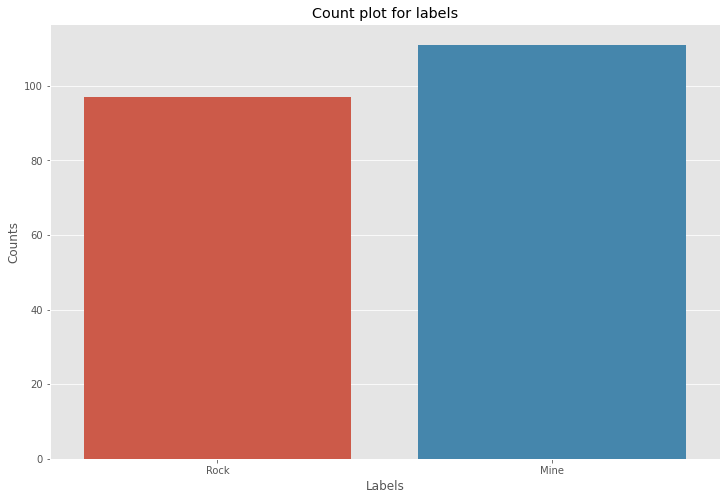

In [10]:
plt.figure(figsize = (12,8))

sns.barplot(x = classes  , y = classes_value)

plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Count plot for labels')

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

##### Dividing the dataset into train data and test data

In [11]:
from sklearn.model_selection import train_test_split

values = data.values

x = values[ : , :60 ]
y = values[ : , 60]
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42) 

##### Printing the shapes

In [12]:
print(f'X_train_shape:{x_train.shape}')
print(f'Y_train_shape:{y_train.shape}')
print(f'X_test_shape:{x_test.shape}')
print(f'Y_test_shape:{y_test.shape}')

X_train_shape:(166, 60)
Y_train_shape:(166,)
X_test_shape:(42, 60)
Y_test_shape:(42,)


### Models

In [13]:
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_fscore_support as score

##### Creating a list to save model performances

In [ ]:
best_results = []

<br>
<br>


### **1. Decision Trees**

##### Hyperparameter tuning for Descision Tree classifier model

In [22]:
#Tuning the Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]}

model = DecisionTreeClassifier()

#Using KFold to split data in train/test sets with  train/test indices 
kfold = KFold(n_splits = 10)

#Using GridSearchCV to search through the best parameter values from the given set of the grid of parameters
grid = GridSearchCV(estimator = model, param_grid = param_grid ,
                    scoring = 'accuracy' , cv = kfold)

grid_result = grid.fit(x_train , y_train)


In [23]:
print('We got best model score {} by using \n\n{}'.format(grid_result.best_score_, grid_result.best_params_))

We got best model score 0.7367647058823529 by using 

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}


##### Creating and training Descision Tree classifier model

In [24]:
# Creating Decision Tree Classifier model using above parameters
dt = DecisionTreeClassifier(criterion = "gini",
                            random_state = 42 ,
                            max_depth=20, 
                            min_samples_leaf=5)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

##### Predictions using Descision Tree classifier model

In [25]:
# Performing predictions on the training dataset
dt_train_pred = dt.predict(x_train)

# Performing predictions on the test dataset
dt_test_pred = dt.predict(x_test)

##### Accuracies of Decision Tree classifier model

In [26]:
# Calculating the accuracy for train data
dt_training_data_accuracy = accuracy_score(dt_train_pred , y_train)

# Calculating the accuracy for test data
dt_test_data_accuracy = accuracy_score(dt_test_pred , y_test)

In [27]:
# Accuracies of the model
print(f"Accuracy of Descision Tree model on training data: {dt_training_data_accuracy}\n")
print(f"Accuracy of Descision Tree model on testing data: {dt_test_data_accuracy}")

Accuracy of Descision Tree model on training data: 0.9096385542168675

Accuracy of Descision Tree model on testing data: 0.7619047619047619


In [28]:
# Appending the performance to the list
best_results.append(dt_test_data_accuracy)

<br>
<br>
<br>
<br><br>
<br>
<br>
<br><br>
<br>
<br>
<br><br>
<br>
<br>
<br><br>
<br>
<br>
<br><br>
<br>
<br>


### **2. Support Vector Machine**

##### Hyperparameter tuning for SVM classifier model

In [29]:
#Tuning the Decision tree classifier
from sklearn.svm import SVC

c_values = [2,3,4,5,6,7,8]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

model = SVC()

#Using KFold to split data in train/test sets with  train/test indices 
kfold = KFold(n_splits = 10)

#Using GridSearchCV to search through the best parameter values from the given set of the grid of parameters
grid = GridSearchCV(estimator = model, param_grid = param_grid ,
                    scoring = 'accuracy' , cv = kfold)

grid_result = grid.fit(x_train , y_train)


In [30]:
print('We got best model score {} by using \n\n {}'.format(grid_result.best_score_, grid_result.best_params_))

We got best model score 0.8613970588235293 by using 

 {'C': 3, 'kernel': 'poly'}


##### Creating and training SVM classifier model

In [31]:
# Creating a SVM classifier model using above parameters
svc = SVC(kernel='poly', random_state = 42 , C = 3)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
svc.fit(x_train, y_train)

SVC(C=3, kernel='poly', random_state=42)

##### Predictions using SVM classifier model

In [32]:
# Performing predictions on the training dataset
svc_train_pred = svc.predict(x_train)

# Performing predictions on the test dataset
svc_test_pred = svc.predict(x_test)

<br>
<br>
<br>
<br>

##### Accuracies of SVM classifier model

In [33]:
# Calculating the accuracy for train data
svc_training_data_accuracy = accuracy_score(svc_train_pred , y_train)

# Calculating the accuracy for test data 
svc_test_data_accuracy = accuracy_score(svc_test_pred , y_test)

In [34]:
# Accuracies of the model
print(f"Accuracy of SVM model on training data: {svc_training_data_accuracy}\n")
print(f"Accuracy of SVM model on testing data: {svc_test_data_accuracy}")

Accuracy of SVM model on training data: 0.9879518072289156

Accuracy of SVM model on testing data: 0.8333333333333334


In [35]:
# Appending the performance to the list
best_results.append(svc_test_data_accuracy)

<br>
<br>
<br>
<br><br>
<br>
<br>
<br><br>
<br>
<br>
<br><br>
<br>
<br>
<br><br>
<br>
<br>
<br><br>
<br>
<br>
<br>

### **3. Random Forest** 

##### Hyperparameter tuning for RF classifier model




In [ ]:
param_grid = {
    'n_estimators': [5, 10, 15, 20],
    'max_features': ['log2', 'sqrt','auto'],
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 3, 8]
}

model = RandomForestClassifier()

#Using KFold to split data in train/test sets with  train/test indices 
kfold = KFold(n_splits = 10)

#Using GridSearchCV to search through the best parameter values from the given set of the grid of parameters
grid = GridSearchCV(estimator = model,
                    param_grid = param_grid,
                    scoring = 'accuracy',
                    cv = kfold)

grid_result = grid.fit(x_train , y_train)

In [ ]:
print('We got best model score {} by using \n\n {}'.format(grid_result.best_score_, grid_result.best_params_))

We got best model score 0.8794117647058822 by using 

 {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 20}


##### Creating and training RF classifier model

In [ ]:
# Creating a RF classifier using the above parameters
rf = RandomForestClassifier(n_estimators = 20, 
                            max_features = 'auto', 
                            criterion = 'gini' ,
                            max_depth = 6,
                            min_samples_split = 3 , min_samples_leaf = 1
                            )

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=6, min_samples_split=3, n_estimators=20)

##### Predictions using RF classifier model

In [ ]:
# Performing predictions on the training dataset
rf_train_pred = rf.predict(x_train)

# Performing predictions on the test dataset
rf_test_pred = rf.predict(x_test)

##### Accuracies of RF classifier model

In [ ]:
# Calculating the accuracy for train data
rf_training_data_accuracy = accuracy_score(rf_train_pred , y_train)

# Calculating the accuracy for test data
rf_test_data_accuracy = accuracy_score(rf_test_pred , y_test)

In [ ]:
# Accuracies of the model
print(f"Accuracy of Random Forest model on training data: {rf_training_data_accuracy}\n")
print(f"Accuracy of Random Forest model on testing data: {rf_test_data_accuracy}")

Accuracy of Random Forest model on training data: 1.0

Accuracy of Random Forest model on testing data: 0.8571428571428571


In [ ]:
# Appending the performance to the list
best_results.append(rf_test_data_accuracy)

### **Comparison of the performance of models**

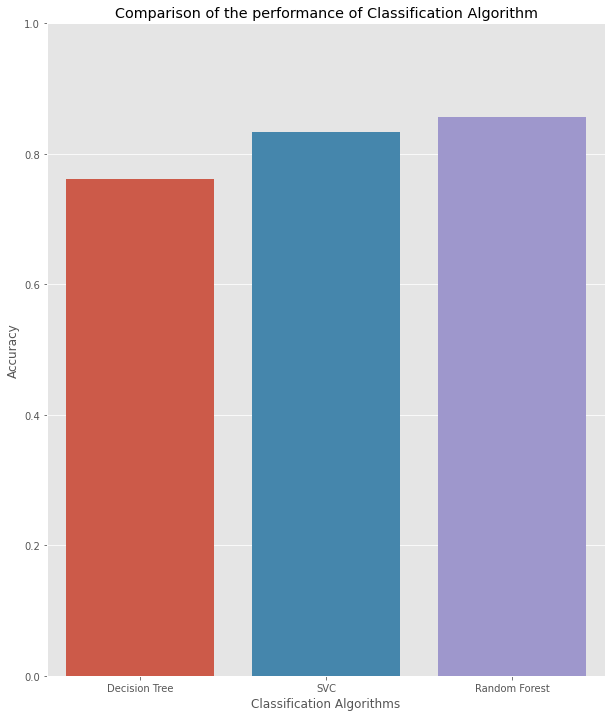


The performance of Decision Tree in Classification is 0.7619047619047619

The performance of SVC in Classification is 0.8333333333333334

The performance of Random Forest in Classification is 0.8571428571428571



In [58]:
models = ['Decision Tree', 'SVC','Random Forest']
fig = plt.figure(figsize = (10, 12)) 


sns.barplot(x=models,y = best_results)
plt.ylim([0,1])
plt.xlabel("Classification Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparison of the performance of Classification Algorithm")
plt.show()
print()

for i,j in zip(best_results,models):
  print("The performance of "+str(j)+" in Classification is "+str(i)+"\n") 

### Thank You :D